In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.ExcelFile('rbull1.xlsx')

In [3]:
raw_data.sheet_names

['rbull1.csv']

In [4]:
data = raw_data.parse('rbull1.csv')

In [5]:
data.head()

,date,id,clicks,conversions,cost,impressions
0,2018-05-01,23842875301030600,2,1,4.360000,227
1,2018-05-01,23842872626260600,1,0,5.520258,263
2,2018-05-01,23842875301030600,5,2,5.340000,278
3,2018-05-01,23842860746290600,0,0,0.070000,1
4,2018-05-01,23842872626260600,5,1,13.080612,702


In [6]:
data['ConversionperCost'] = (data['conversions']/data['cost']).replace([np.inf, -np.inf], np.nan)

In [31]:
data.head()

,date,id,clicks,conversions,cost,impressions,ConversionperCost
0,2018-05-01,23842875301030600,2,1,4.360000,227,0.229358
1,2018-05-01,23842872626260600,1,0,5.520258,263,0.000000
2,2018-05-01,23842875301030600,5,2,5.340000,278,0.374532
3,2018-05-01,23842860746290600,0,0,0.070000,1,0.000000
4,2018-05-01,23842872626260600,5,1,13.080612,702,0.076449


In [32]:
opt_data = (data[['id','ConversionperCost']].copy(deep = True))

In [33]:
opt_data.pivot(columns='id', values='ConversionperCost')

id,6088935321237,6088935321437,6088935333637,6088935334437,6088935350037,6088935350837,6088935363037,6088935363237,6088935365037,6088935365837,...,23843003186980600,23843003186990600,23843003187000600,23843003187010600,23843003187020600,23843003187410600,23843003187420600,23843003187430600,23843003187440600,23843003187450600
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Upper Confidence Bound

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# # Importing the dataset
dataset = pd.read_csv('UCB/Ads_CTR_Optimisation.csv')

adset = {}
ads = set(opt_data['id'])
for i,adv in enumerate(ads):
    adset[adv] = i
    

In [26]:
# Implementing UCB
import math
N = len(opt_data)
d = len(set(opt_data))
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = opt_data.values[n, 1]
#     print(dataset.values[n, ad])
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward


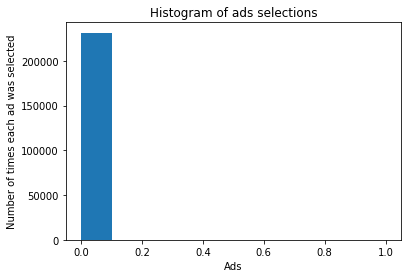

In [27]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [ ]:
opt_data.pivot(columns='id',values='ConversionperCost')

In [25]:
opt_data.values[0,1]

0.2293577981651376

In [19]:
dataset.values[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
opt_data.head()

,id,ConversionperCost
0,23842875301030600,0.229358
1,23842872626260600,0.000000
2,23842875301030600,0.374532
3,23842860746290600,0.000000
4,23842872626260600,0.076449


In [29]:
adset

{23842795416690700: 0,
 6096204365837: 1,
 6096471842837: 2,
 23842806369820700: 3,
 6095175057437: 4,
 6095652241437: 5,
 6097011908637: 6,
 23842799612870700: 7,
 6093228859437: 8,
 6095974817837: 9,
 6096204398637: 10,
 23842806422470700: 11,
 6095974826037: 12,
 6097337360437: 13,
 23842804872560700: 14,
 6096914661437: 15,
 6095974842437: 16,
 6097840570437: 17,
 23842798612250700: 18,
 6093785129037: 19,
 6096204431437: 20,
 6096275701837: 21,
 6096770293837: 22,
 6096203210837: 23,
 23842793657540700: 24,
 23842804849860700: 25,
 6097002348637: 26,
 6097012383837: 27,
 23842807747780700: 28,
 6095900328037: 29,
 23842799613550700: 30,
 6095896240237: 31,
 23842804871790700: 32,
 6097011990637: 33,
 6093228114037: 34,
 6096915538037: 35,
 23842974599700600: 36,
 23842795416600700: 37,
 6095652135037: 38,
 23842812942360700: 39,
 6095649685637: 40,
 23842812964290700: 41,
 6096274333837: 42,
 6093228351637: 43,
 6094650892437: 44,
 23842986158440600: 45,
 23842799612780700: 46,
 2

In [1]:
import numpy as np
import random


In [13]:
random.seed(0)
a = random.betavariate(10,20)
print(a)

0.4368933102012902
